### <U>SAFETY PREDICTION IN VARIOUS DISTRICTS OF CHICAGO IN DIFFERENT TIME OF THE YEAR</U>

#### GROUP MEMBERS: 
1. Sami Ahmad Khan, A20352677
2. Zeeshan Aamir Khavas, A20341778

#### PROJECT DESCRIPTION:
In this phase we have used the processed data set "Cleaned_file.csv" from 'Data Exploration part'. In this phase we are making use of the differnet classification models learned in course CS584. The dataset has binary target {0, 1}, which can be efficiently evaluated using clssification models.

Following are the classification models used for comparing with the baseline accuracy:
1. Gaussian Naive Bayes
2. Decision Trees
3. MLPC Classifier
4. Logistic Regression
5. Support Vector Machines

Using 'CROSS_VAL_SCORE', the above clssification models are evaluated based on their accuracy. Then the model with the best accuracy score is considered for the dataset classification.

In [1]:
import numpy as np
import urllib
from sklearn import preprocessing
import pandas as pd
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
from numpy import loadtxt, where
from pylab import scatter, show, legend, xlabel, ylabel
from matplotlib.colors import ListedColormap
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


In [2]:
#Preprocessed clean version of input file
input_file = "Cleaned_file.csv"

In [3]:
df = pd.read_csv(input_file)

In [4]:
# Printing Data Shape
df.shape

(11670, 6)

In [5]:
df.head(10)

,District,Date,Primary Type,Arrest,Crime Weightage,Label
0,11,5/3/16 21:00,NARCOTICS,True,3,1
1,8,5/3/16 21:35,THEFT,False,1,1
2,9,5/3/16 14:45,ASSAULT,False,3,1
3,8,5/3/16 18:42,BATTERY,False,2,1
4,9,5/3/16 19:30,CRIMINAL DAMAGE,False,3,1
5,11,5/3/16 13:30,OTHER OFFENSE,False,2,0
6,1,5/3/16 19:30,THEFT,False,1,1
7,1,5/3/16 9:11,DECEPTIVE PRACTICE,False,1,0
8,1,5/3/16 6:30,THEFT,False,1,1
9,16,5/3/16 18:30,THEFT,False,1,0


In [6]:
# Giving numeric values for text data
primaryType = preprocessing.LabelEncoder()
arrest = preprocessing.LabelEncoder()
#date = preprocessing.LabelEncoder()

In [7]:
df["Primary Type"] = primaryType.fit_transform(df["Primary Type"])
df["Arrest"] = arrest.fit_transform(df["Arrest"])
#df["Date"] = date.fit_transform(df["Date"])

In [8]:
df['Date'] = df['Date'].apply(lambda x: x.split('/')[0])

In [15]:
df.head()

,District,Date,Primary Type,Arrest,Crime Weightage,Label
0,11,5,16,1,3,1
1,8,5,28,0,1,1
2,9,5,1,0,3,1
3,8,5,2,0,2,1
4,9,5,6,0,3,1


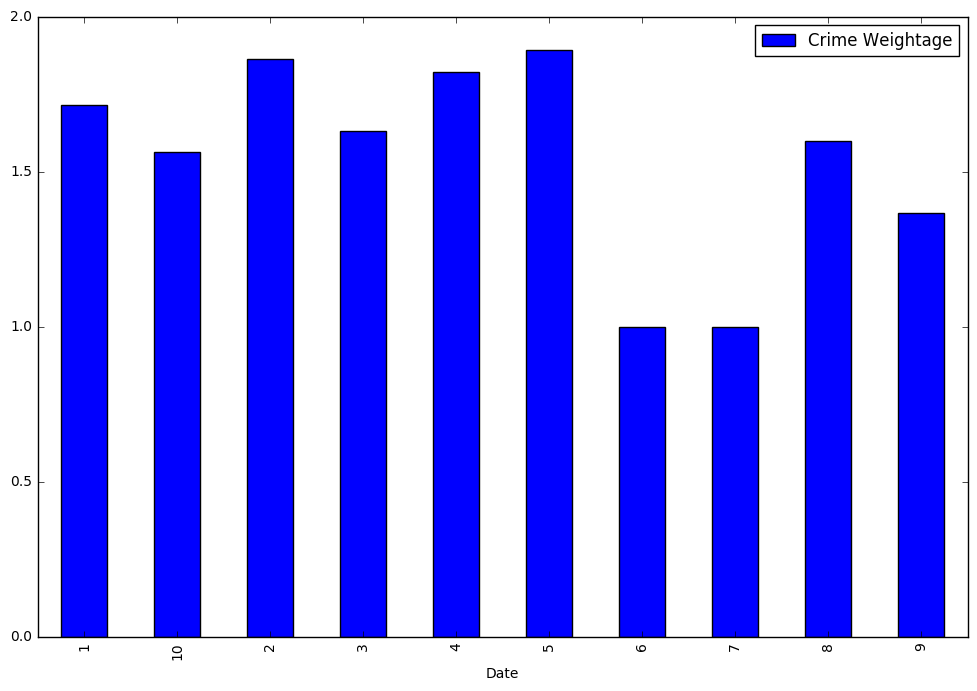

In [24]:
fig, ax = plt.subplots()
plot2_df = new_df.groupby(['Date']).agg({'Crime Weightage':'mean'}).plot(kind = 'bar', ax=ax)

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 8
plt.xlabel='Month'
plt.rcParams["figure.figsize"] = fig_size
plt.show()

In [10]:
#df.head()
keep_col = ['District', 'Date', 'Primary Type', 'Crime Weightage', 'Label']
new_df = df[keep_col]

In [11]:
array = new_df.values
array

array([[11, '5', 16, 3, 1],
       [8, '5', 28, 1, 1],
       [9, '5', 1, 3, 1],
       ..., 
       [9, '10', 10, 4, 0],
       [2, '10', 10, 4, 0],
       [2, '5', 10, 4, 0]], dtype=object)

In [12]:
# Features
X = list(array[:,0:4])

In [13]:
# Target
Y = list(array[:,4])

In [14]:
totalTarget = df["Label"].count()

# Count of 0s in the target
zeroCount = df[(df["Label"] == 0)].count()[0]
print(zeroCount)
# Count of 1s in the target
oneCount = df[(df["Label"] == 1)].count()[0]
print(oneCount)
#Probability of 0s in the target
probZero = zeroCount / totalTarget

#Probability of 1s in the target
probOne = oneCount / totalTarget

print("Probability of 0s in the Target: ", '%0.3f'%(probZero))
print("Probability of 1s in the Target: ", '%0.3f'%(probOne))

6873
4797
Probability of 0s in the Target:  0.589
Probability of 1s in the Target:  0.411


#### Since probability for 0s in the target is higher than 1s, we'll use 0.59 as our Baseline Accuracy.
BASELINE_ACCURACY = 0.59

### We have used ACCURACY as our base for Performace Measure

#### Splitting Train and Test Data 

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.70, random_state=0)

#### LOGISTIC REGRESSION:
<b>Parameters:</b><br>
C = {5, 2, 1, 0.1, 0.01, 0.001, 0.002, 0.0001, 0.00001}<br>
max_iter = 1000<br>
random_state = 0<br>
solver = sag [used for large datasets]

<b>Crossval Parameters:</b><br>
cv = 10<br>
scoring = 'accuracy'<br>

In [16]:
# Calculating accuracy of LOGISTIC REGRESSION using CROSS_VAL_SCORE
C= [5,2,1,0.1,0.01,0.001,0.002,0.0001,0.00001]
for c in C: 
    clf = LogisticRegression(C = c, max_iter = 1000, random_state=0, solver='sag')
    scoresLR = cross_val_score(clf,X_train,y_train,cv=10,scoring='accuracy')
    print("Accuracy with C = ",c,": %0.5f(+/- %0.5f)" %(scoresLR.mean(), scoresLR.std()*2))

Accuracy with C =  5 : 0.68058(+/- 0.02743)
Accuracy with C =  2 : 0.68058(+/- 0.02743)
Accuracy with C =  1 : 0.68058(+/- 0.02743)
Accuracy with C =  0.1 : 0.68132(+/- 0.02742)
Accuracy with C =  0.01 : 0.68169(+/- 0.03421)
Accuracy with C =  0.001 : 0.68132(+/- 0.03117)
Accuracy with C =  0.002 : 0.68144(+/- 0.03282)
Accuracy with C =  0.0001 : 0.68144(+/- 0.03151)
Accuracy with C =  1e-05 : 0.63100(+/- 0.02456)


The Accuracy is highest at C = 0.002 with value of <b>0.68144</b>.

#### DECISION TREE CLASSIFIER:
<b>Parameters:</b><br>
Default<br>

<b>Crossval Parameters:</b><br>
cv = 10<br>
scoring = 'accuracy'<br>

In [17]:
# Calculating accuracy of DECISION TREE CLASSIFIER using CROSS_VAL_SCORE
dtree = tree.DecisionTreeClassifier()
scoresDT = cross_val_score(dtree,X_train,y_train,cv=10,scoring='accuracy')
print("Accuracy with Decision Tree: %0.5f (+/- %0.5f)" % (scoresDT.mean(), scoresDT.std() * 2))

Accuracy with Decision Tree: 0.99963 (+/- 0.00221)


<b>NOTE:</b> The Accuracy for Decision Tree Classifier is <b>0.99976</b>, which is almost 100%. Such high accuracy is due to the fact that the dataset is very large and the target has binary values. The target variable in our dataset has roughly 60% and 40% negative classes respectively, thus it is a balanced dataset. When we train a decision tree to classify this data, we get an overall accuracy of 99.97% (~100%). Hence we will ignore this classification model.

#### NAIVE BAYES
<b>Parameters:</b><br>
Default<br>

<b>Crossval Parameters:</b><br>
cv = 10<br>
scoring = 'accuracy'<br>

In [18]:
# Calculating accuracy of NAIVE BAYES using CROSS_VAL_SCORE
gnb = GaussianNB()
scores = cross_val_score(gnb,X_train,y_train,cv=10,scoring='accuracy')
print("Accuracy with Gaussian Naive Bayes: %0.5f (+/- %0.5f)" % (scores.mean(), scores.std() * 2))

Accuracy with Gaussian Naive Bayes: 0.69467 (+/- 0.03100)


The accuracy with Naive Bayes is <b>0.69467</b>

#### MLPC CLASSIFIER
<b>Parameters:</b><br>
activation_function = {'logistic', 'tanh', 'relu'}<br>
learning_rate (L) = {5, 2, 1, 0.1, 0.01, 0.001, 0.002, 0.0001, 0.00001}<br>
hidden_layers = {1, 2, 3}<br>
neurons = {3, 4, 5, 6, 7}<br>
alpha = {0.1, 0.001, 0.0001, 0.00001}<br>


<b>Crossval Parameters:</b><br>
cv = 10<br>
scoring = 'accuracy'<br>

In [ ]:
L = [0.001,0.002,0.003,0.004,0.005,0.006,0.0001,0.00001, 0.000001]
func = ['logistic', 'tanh', 'relu']
hLayer = [1, 2, 3]
neurons = [3, 4, 5, 6, 7]
alpha = [0.1, 0.001, 0.0001, 0.00001]

for a in alpha:
    for l in L:
        for f in func:
            for h in hLayer:
                for n in neurons:
                    temp = []
                    for i in range(h):
                        temp.append(n)
                    temp = tuple(temp)
                    MLPC = MLPClassifier(random_state=0,hidden_layer_sizes=temp, learning_rate='adaptive',max_iter=10000, learning_rate_init=l, alpha=a, activation=f) 
                    scoresMLPC = cross_val_score(MLPC,X_train,y_train,cv=10,scoring='accuracy')
                    print("Accuracy with MLPC Classifier with L=",l,"a=", a, "hl=", temp, "func=", f, ": %0.5f (+/- %0.5f)" % (scoresMLPC.mean(), scoresMLPC.std() * 2))


Accuracy with MLPC Classifier with L= 0.001 a= 0.1 hl= (3,) func= logistic : 0.69638 (+/- 0.02501)
Accuracy with MLPC Classifier with L= 0.001 a= 0.1 hl= (4,) func= logistic : 0.73054 (+/- 0.02555)
Accuracy with MLPC Classifier with L= 0.001 a= 0.1 hl= (5,) func= logistic : 0.69883 (+/- 0.02212)
Accuracy with MLPC Classifier with L= 0.001 a= 0.1 hl= (6,) func= logistic : 0.70507 (+/- 0.01660)
Accuracy with MLPC Classifier with L= 0.001 a= 0.1 hl= (7,) func= logistic : 0.72760 (+/- 0.03576)
Accuracy with MLPC Classifier with L= 0.001 a= 0.1 hl= (3, 3) func= logistic : 0.70140 (+/- 0.02015)
Accuracy with MLPC Classifier with L= 0.001 a= 0.1 hl= (4, 4) func= logistic : 0.69968 (+/- 0.01987)
Accuracy with MLPC Classifier with L= 0.001 a= 0.1 hl= (5, 5) func= logistic : 0.69895 (+/- 0.02452)
Accuracy with MLPC Classifier with L= 0.001 a= 0.1 hl= (6, 6) func= logistic : 0.69221 (+/- 0.03072)
Accuracy with MLPC Classifier with L= 0.001 a= 0.1 hl= (7, 7) func= logistic : 0.69160 (+/- 0.02157)


<b>Accuracy with MLPC Classifier with learning_rate = 0.006, alpha = 0.1, hidden_layer= (5, 5, 5) activation_function= relu is 0.76984 (+/- 0.03815)</b>

#### SUPPORT VECTOR MACHINE 
<b>Parameters:</b><br>
C = {0.1, 1, 10}<br>
degree = {2, 3, 4}<br>
kernel = {'linear', 'poly', 'rbf', 'sigmoid'}<br>

<b>Crossval Parameters:</b><br>
cv = 10<br>
scoring = 'accuracy'<br>

In [ ]:
param = ['kernel', 'C', 'degree']
kernel = ['linear', 'poly', 'rbf', 'sigmoid']
C = [0.1, 1, 10]
degree = [2, 3, 4]

for k in kernel:
    for c in C:
        for d in degree:
            svclf = SVC(cache_size=1000, kernel=k,C=c,degree=d) # Increased Cache size for larger datasets
            scores = cross_val_score(svclf,X_train,y_train,cv=10,scoring='accuracy')
            print("Accuracy with SVM parameters:K=",k," C=", c, " d=", d, ": %0.5f (+/- %0.5f)" % (scores.mean(), scores.std() * 2))

Accuracy with SVM parameters:K= linear  C= 0.1  d= 2 : 0.65855 (+/- 0.03128)
Accuracy with SVM parameters:K= linear  C= 0.1  d= 3 : 0.65855 (+/- 0.03128)
Accuracy with SVM parameters:K= linear  C= 0.1  d= 4 : 0.65855 (+/- 0.03128)
Accuracy with SVM parameters:K= linear  C= 1  d= 2 : 0.65855 (+/- 0.03128)
Accuracy with SVM parameters:K= linear  C= 1  d= 3 : 0.65855 (+/- 0.03128)
Accuracy with SVM parameters:K= linear  C= 1  d= 4 : 0.65855 (+/- 0.03128)


#### Accuracy of the various models in the order of increasing accuracy:
1. Logistic Regression     : 0.68144
2. Naive Bayes             : 0.69467
3. MLPC Classifer          : 0.76984
4. Support Vector Machines : 0.65855
5. Decision Tree Classifier: 0.99976 (ignored)


#### Comparing the accuracy for all the models, we found MLPC CLASSIFIER to be the best for our dataset as it gives the best accuracy of  0.76984. 

### Running MLPClassifier on Test Data

In [17]:
MLPC = MLPClassifier(learning_rate_init = 0.006, alpha = 0.1, hidden_layer_sizes = (5, 5, 5), activation = 'relu')

In [18]:
MLPC.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.1, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5, 5, 5), learning_rate='constant',
       learning_rate_init=0.006, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [19]:
print("MLPClassifier score on Test Data is: %.3f" % MLPC.score(X_test, y_test))

MLPClassifier score on Test Data is: 0.760


In [46]:
X_test[0]

array([19, '5', 6, 3], dtype=object)

In [48]:
Y_pred = MLPC.predict(np.array([19, '5', 6, 3], dtype=object))
print(Y_pred)

[1]


/Users/samiahmadkhan/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


In [34]:
Y_pred = MLPC.predict(X_test[0])
param = MLPC.get_params(deep=True)
accuracy = metrics.accuracy_score(y_train, Y_pred)

print("Accuracy of MLPClassifier using metrics: %.3f" % accuracy)
print(param)

/Users/samiahmadkhan/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


ValueError: Found input variables with inconsistent numbers of samples: [8168, 1]

### FINAL COMMENTS:

Accuracy Score for MLPC on Test Data = <b>0.698</b>